# Analysis Report: Employee Attrition in HR Dataset

## Introduction

Employee attrition, also known as turnover, is a critical concern for companies seeking to maintain productivity and reduce recruitment costs. The dataset provided contains records of employees, their work-related characteristics, and whether they left the company (indicated by the `left` variable). By exploring the factors influencing employee attrition, this analysis aims to identify key drivers of turnover and offer actionable insights for the senior leadership team.

The analysis leverages several logistic regression, machine learning and data visualization techniques to uncover patterns in the data and build a predictive model for employee churn.

##### Import packages

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

## Data Overview

The dataset consists of 10 variables, each representing different attributes related to employee performance and demographics:

- **satisfaction_level**: A continuous variable indicating how satisfied employees are with their work.
- **last_evaluation**: A score representing the latest performance evaluation.
- **number_project**: The number of projects an employee has worked on.
- **average_monthly_hours**: The average number of hours worked by an employee per month.
- **time_spend_company**: The number of years an employee has worked at the company.
- **Work_accident**: A binary indicator showing whether the employee has had a work accident (1 = Yes, 0 = No).
- **left**: A binary variable indicating whether the employee left the company (1 = Yes, 0 = No).
- **promotion_last_5years**: A binary indicator of whether the employee was promoted in the last 5 years.
- **Department**: The department in which the employee works.
- **salary**: A categorical variable indicating salary level (low, medium, or high).

The target variable of interest is `left`, which indicates employee attrition.

In [5]:
df0 = pd.read_csv("HR_comma_sep.csv")
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


#### Overview Of The Dataset

In [7]:
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Key Statistics

Upon initial inspection, the following trends were observed:
- **Satisfaction Levels**: Satisfaction levels range from very low to very high. The distribution of satisfaction shows that employees who left tend to have lower satisfaction scores, suggesting a strong correlation between dissatisfaction and attrition.
- **Performance Evaluations**: Employees who left generally had slightly lower performance evaluations than those who stayed.
- **Working Hours**: Average monthly hours worked shows a wide range, with potential outliers. Some employees who left the company worked significantly more hours, indicating possible burnout.

## Data Cleaning and Preparation

To prepare the data for modeling, the following steps were taken:
- **Checked And Removed Null Values** 
- **Checked And Removed Dulicate Values**
- **Changed 'Department' and 'salary' Column Type From Object To Categorical**

#### Checking For Null Values

In [11]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


#### Checking For Total Number of Duplicate Values

In [13]:
df0.duplicated().sum()

3008

#### Droping All Duplicates

In [15]:
df0.drop_duplicates(inplace=True)
df0.duplicated().any()

False

#### Changing Column Type From Object To Categorical

In [17]:
df0['Department'] = df0['Department'].astype('category')
df0['salary'] = df0['salary'].astype('category')
df0.rename(columns={'average_montly_hours': 'average_monthly_hours'}, inplace=True)
df0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   satisfaction_level     11991 non-null  float64 
 1   last_evaluation        11991 non-null  float64 
 2   number_project         11991 non-null  int64   
 3   average_monthly_hours  11991 non-null  int64   
 4   time_spend_company     11991 non-null  int64   
 5   Work_accident          11991 non-null  int64   
 6   left                   11991 non-null  int64   
 7   promotion_last_5years  11991 non-null  int64   
 8   Department             11991 non-null  category
 9   salary                 11991 non-null  category
dtypes: category(2), float64(2), int64(6)
memory usage: 867.0 KB


### Boxplot
Using boxplot to find outliers in the dataset.

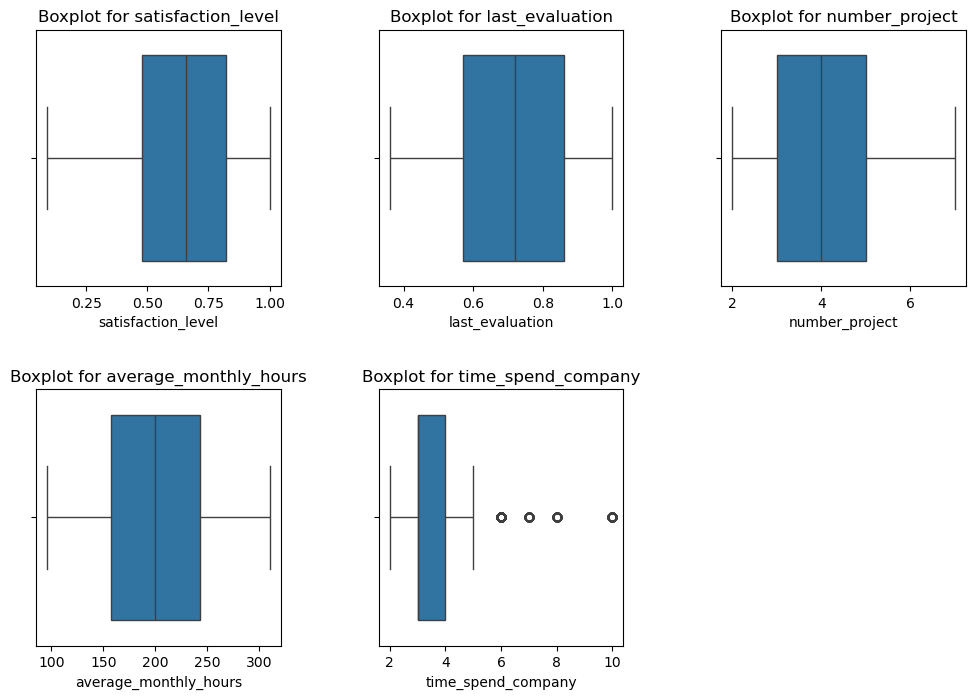

In [19]:
for_plotting = df0.drop(['salary', 'Department','promotion_last_5years', 'left','Work_accident'], axis=1)

num_plots = len(for_plotting)

plt.figure(figsize=(12,8))

for i,col in enumerate(for_plotting):
    plt.subplot(2, 3, i+1)
    plt.title(f'Boxplot for {col}', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    sns.boxplot(x=df0[col])
    
plt.subplots_adjust(wspace=0.4, hspace=0.4)

plt.show()

We can observe from the above figuers there are outliers in the 'time_spent_company' column of the dataset. In a regression model outliers can skew the model's understanding of the relationship between variables, leading to inaccurate parameter estimates. But in some Machine Learning algorithm like the Random Forest Algorithm outliers have less impact.

### Pie Chart
Using pie chart to check the balance of the dataset.

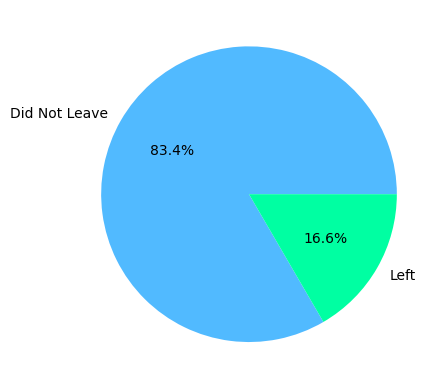

In [22]:
labels = ['Did Not Leave', 'Left']
df0.groupby('left').size().plot(kind='pie', labels=labels, autopct='%1.1f%%', ylabel='', colors=['#51BAFF', '#00FFA2'])

plt.show()

The above figure shows that the class distribution indicates that our target class is imbalanced, as there is a large discrepancy in the number of observations between the classes.

Data collection was not done properly, hence there are biases in the data. Because they strive for general accuracy, regression and machine learning models are prone to bias toward the majority. This means they may perform poorly on the minority class, thus leading to an incorrect prediction model.

## Exploratory Data Analysis (EDA)


### Histogram

Histogram to show salary distribution of employees and salary distribution of employees who left or did not leave.

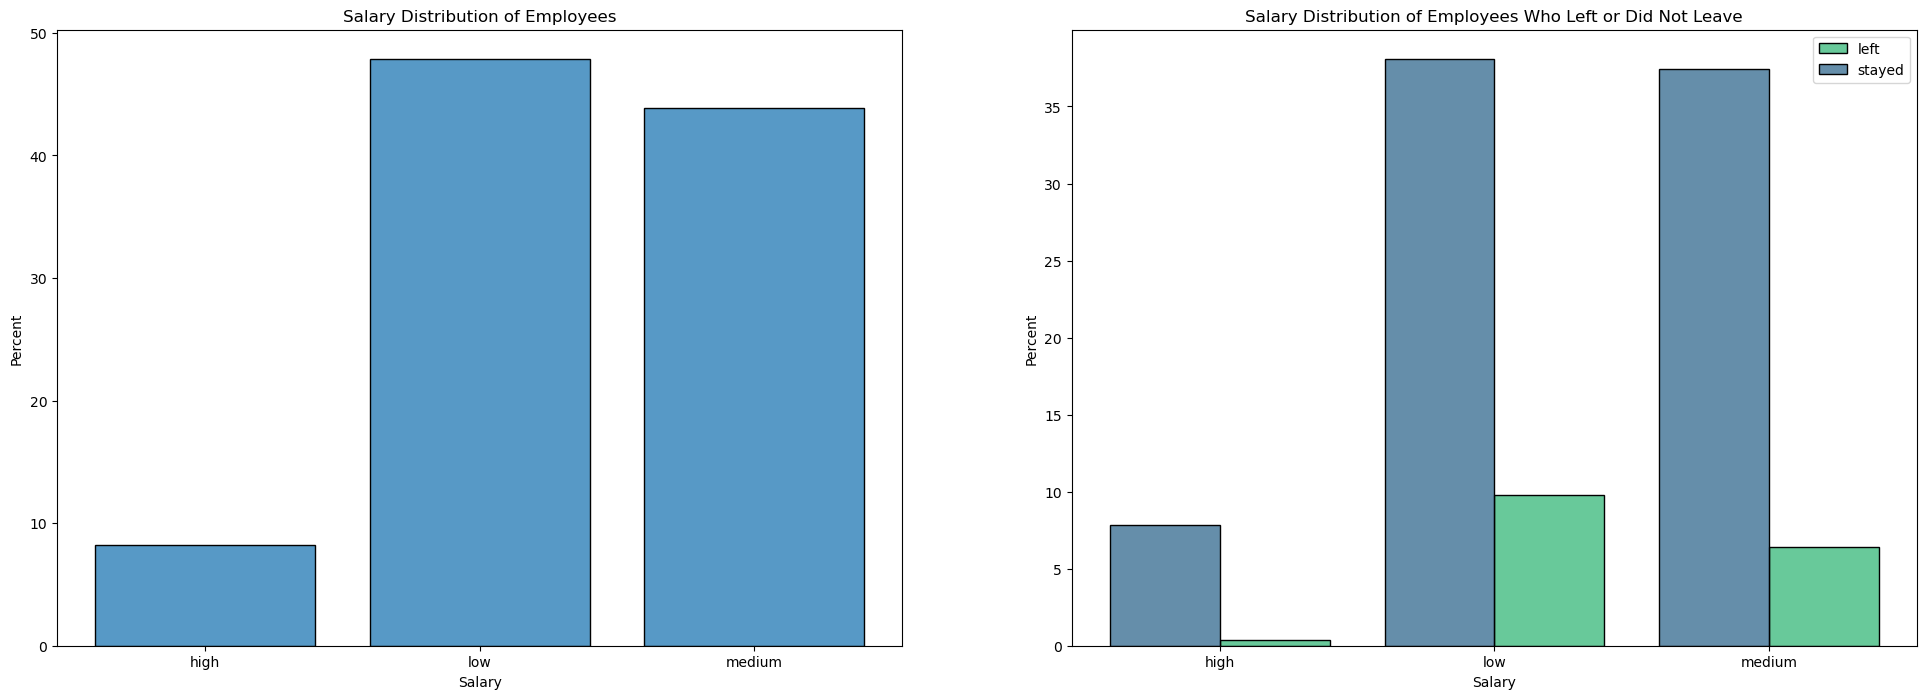

In [25]:
plt.figure(figsize=(24, 8))

plt.subplot(1, 2, 1)
sns.histplot(data=df0, x='salary', shrink=.8, stat='percent')
plt.title('Salary Distribution of Employees')
plt.xlabel('Salary')
plt.ylabel('Percent')

plt.subplot(1, 2, 2)
sns.histplot(data=df0, x='salary', hue='left', multiple='dodge', shrink=.8, stat='percent', palette='viridis')
plt.title('Salary Distribution of Employees Who Left or Did Not Leave')
plt.legend(labels=['left', 'stayed'])
plt.xlabel('Salary')
plt.ylabel('Percent')

plt.show()

**Histogram Of Different Departments In The Company And Distribution of Different Departments for Employees Who Left and Did Not Leave**

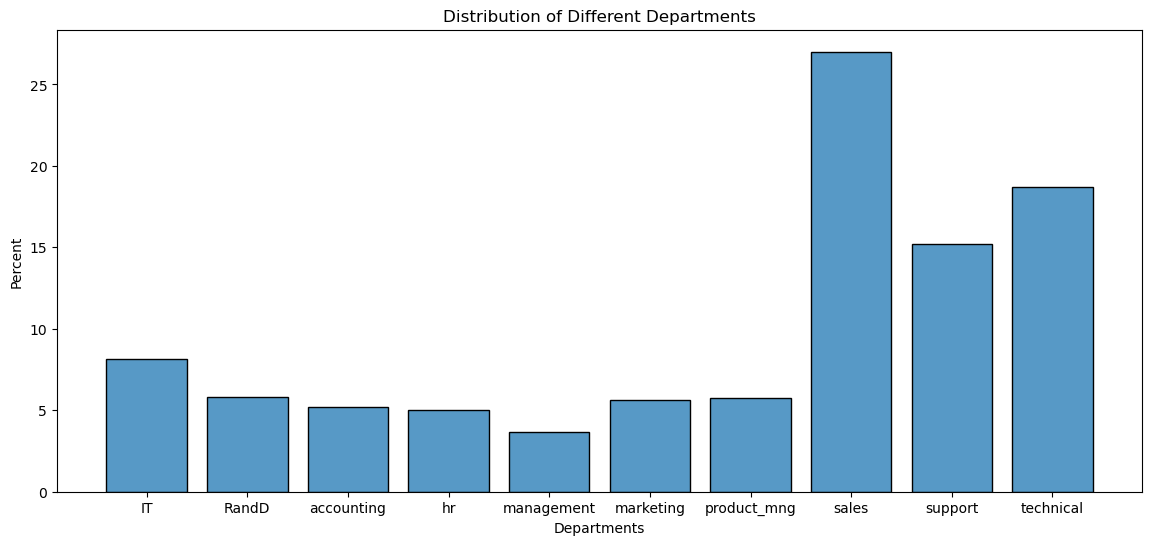

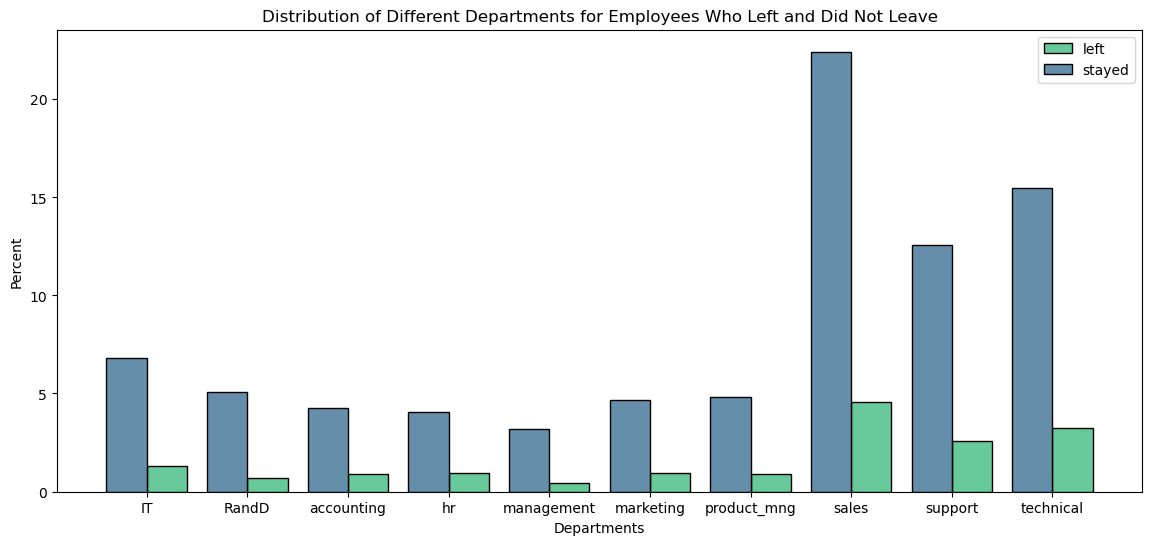

In [27]:
plt.figure(figsize=(14, 6))
sns.histplot(data=df0, x='Department', shrink=.8, stat='percent')
plt.title('Distribution of Different Departments')
plt.xlabel('Departments')
plt.ylabel('Percent')

plt.figure(figsize=(14, 6))
sns.histplot(data=df0, x='Department', hue='left', multiple='dodge', shrink=.8, stat='percent', palette='viridis')
plt.title('Distribution of Different Departments for Employees Who Left and Did Not Leave')
plt.legend(labels=['left', 'stayed'])
plt.xlabel('Departments')
plt.ylabel('Percent')

plt.show()

#### Polygraph 

Polygraph to show distribution of last evaluation for employees who left or did not leave, distribution of average monthly hours for employees who left or did not leave, and distribution of satisfaction level for employees who left or did not leave

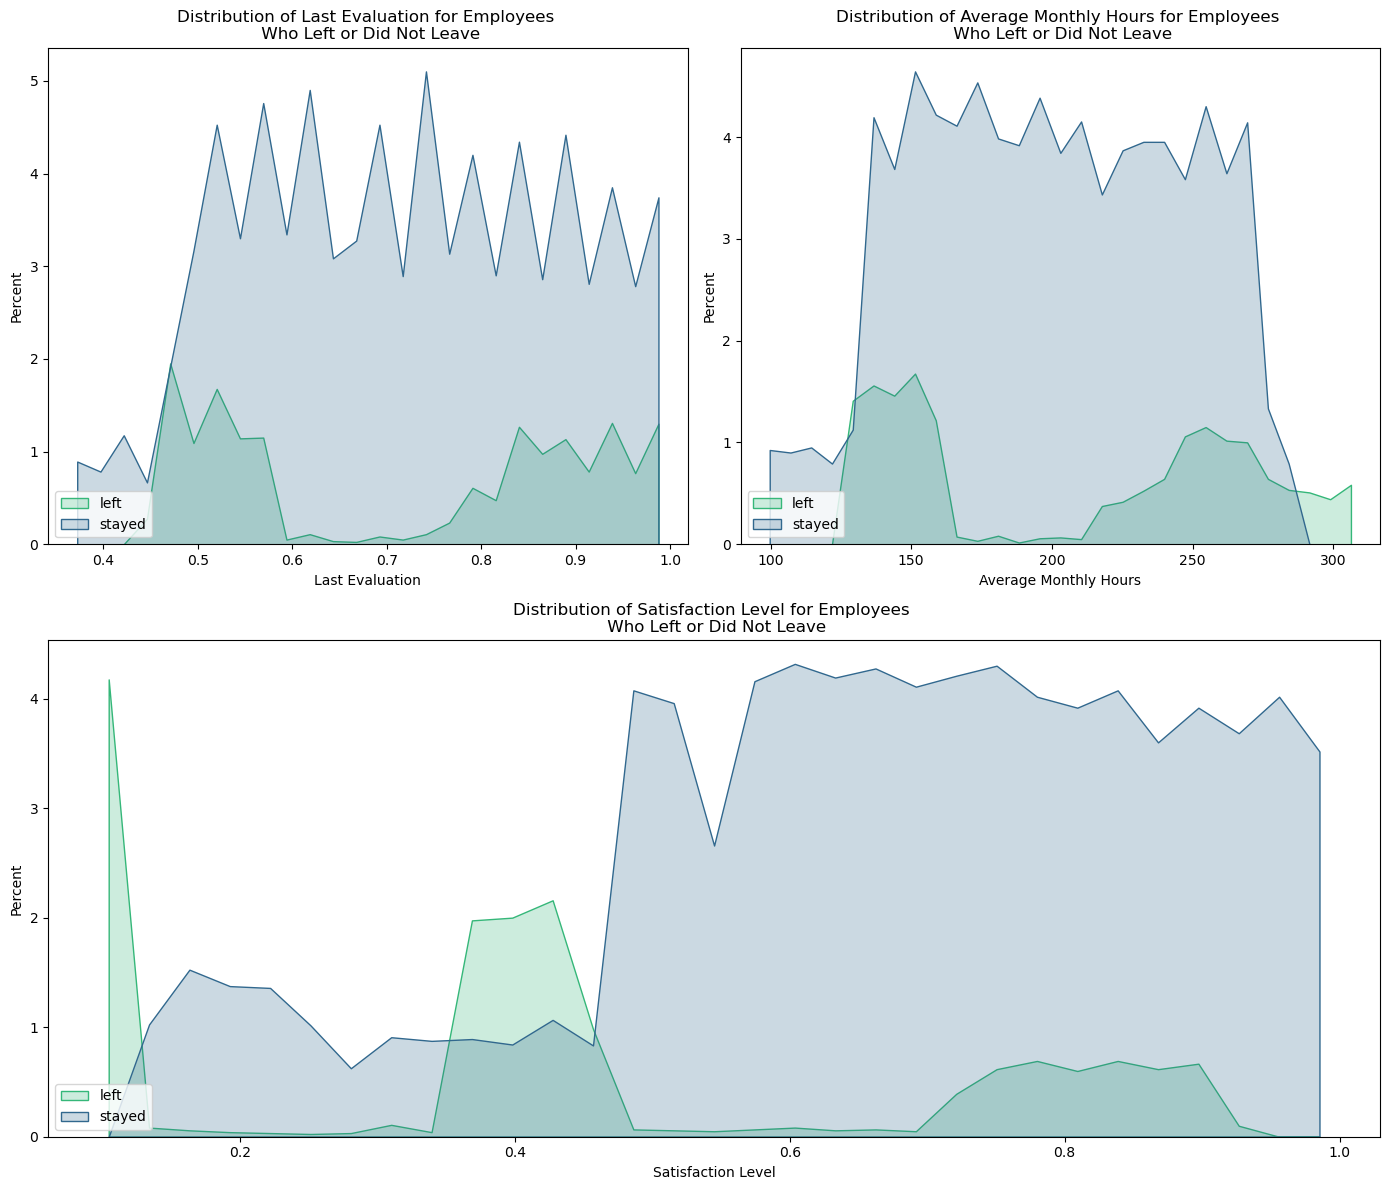

In [29]:
plt.figure(figsize=(14, 12))

plt.subplot(2, 2, 1)
sns.histplot(data=df0, x="last_evaluation", hue="left", element="poly", stat='percent', palette='viridis')
plt.title('Distribution of Last Evaluation for Employees \n Who Left or Did Not Leave')
plt.legend(labels=['left', 'stayed'], loc="lower left")
plt.xlabel('Last Evaluation')
plt.ylabel('Percent')

plt.subplot(2, 2, 2)
sns.histplot(data=df0, x="average_monthly_hours", hue="left", element="poly", stat='percent', palette='viridis')
plt.title('Distribution of Average Monthly Hours for Employees \n Who Left or Did Not Leave')
plt.legend(labels=['left', 'stayed'], loc="lower left")
plt.xlabel('Average Monthly Hours')
plt.ylabel('Percent')

plt.subplot(2, 2, (3, 4))
sns.histplot(data=df0, x="satisfaction_level", hue="left", element="poly", stat='percent', palette='viridis')
plt.title('Distribution of Satisfaction Level for Employees \n Who Left or Did Not Leave')
plt.legend(labels=['left', 'stayed'], loc="lower left")
plt.xlabel('Satisfaction Level')
plt.ylabel('Percent')

plt.tight_layout()
plt.show()

### Heatmap

Using a heatmap to compare the number of employees who left with those who had a work accident and with those who received promotions during the previous five years

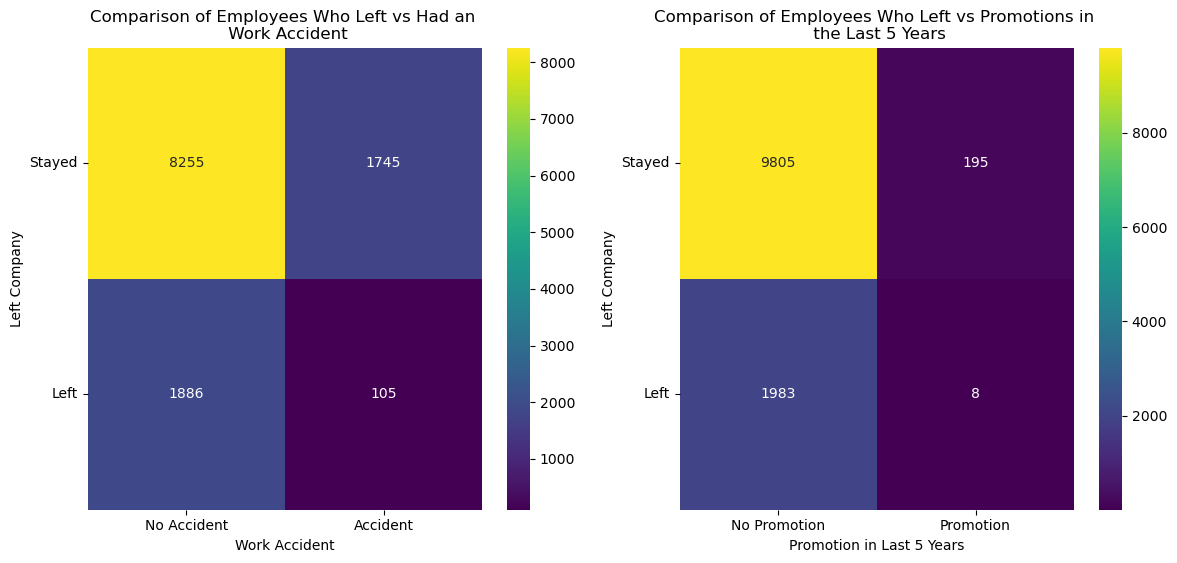

In [31]:
plt.figure(figsize=(14, 6))
comparison_summary = df0.groupby(['left', 'Work_accident']).size().unstack()

plt.subplot(1, 2, 1)
sns.heatmap(comparison_summary, annot=True, fmt="d", cmap="viridis")
plt.title('Comparison of Employees Who Left vs Had an \n Work Accident')
plt.xlabel('Work Accident')
plt.ylabel('Left Company')
plt.xticks([0.5, 1.5], ['No Accident', 'Accident'])
plt.yticks([0.5, 1.5], ['Stayed', 'Left'], rotation=0)

comparison_summary = df0.groupby(['left', 'promotion_last_5years']).size().unstack()

plt.subplot(1, 2, 2)
sns.heatmap(comparison_summary, annot=True, fmt="d", cmap="viridis")
plt.title('Comparison of Employees Who Left vs Promotions in \n the Last 5 Years')
plt.xlabel('Promotion in Last 5 Years')
plt.ylabel('Left Company')
plt.xticks([0.5, 1.5], ['No Promotion', 'Promotion'])
plt.yticks([0.5, 1.5], ['Stayed', 'Left'], rotation=0)

plt.show()

#### Histogram

Histogram to show distribution of number of projects for employees who left or did not leave and distribution of time spent at the company for employees who left or did not leave

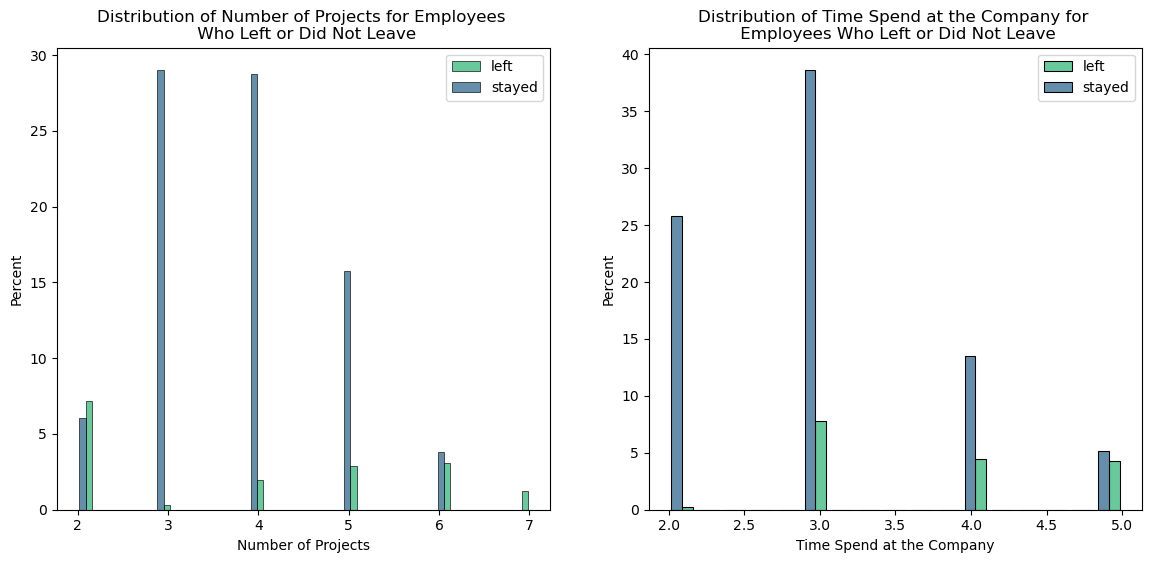

In [33]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(data=df0, x="number_project", hue="left", multiple='dodge', shrink=.8, stat='percent', palette='viridis')
plt.title('Distribution of Number of Projects for Employees \n Who Left or Did Not Leave')
plt.legend(labels=['left', 'stayed'])
plt.xlabel('Number of Projects')
plt.ylabel('Percent')

z = np.abs(stats.zscore(df0['time_spend_company']))
outliers = df0[z > 1.5]
df0_outliers = df0.drop(outliers.index)

plt.subplot(1, 2, 2)
sns.histplot(data=df0_outliers, x="time_spend_company", hue="left", multiple='dodge', shrink=.8, stat='percent', palette='viridis')
plt.title('Distribution of Time Spend at the Company for \n Employees Who Left or Did Not Leave')
plt.legend(labels=['left', 'stayed'])
plt.xlabel('Time Spend at the Company')
plt.ylabel('Percent')

plt.show()

### Visualization Insights

The analysis includes a variety of visualizations to better understand the relationships between features and attrition:
- **Boxplots and Histograms**: These were used to explore the distributions of numerical features like `satisfaction_level`, `average_monthly_hours`, `number_project` and . From these plots, it was observed that:
  - Employees who left the company had notably lower satisfaction levels compared to those who stayed.
  - Employees who worked an exceptionally high number of hours (above the average) also tended to leave at a higher rate, suggesting a possible link between overwork and attrition.
  - The number of projects worked on seemed to follow a normal distribution, with most employees working between 3 and 5 projects. Those working on extreme numbers of projects (either very few or too many) had a higher likelihood of leaving.

- **Heatmap**: According to the 'Comparison of Employees Who Left vs. Promotions in the Last 5 Years' heatmap, employee turnover is higher for those who have not received a promotion in the last five years than for those who have.

-  **Columns To Drop**: It might be necessary to exclude `last_evaluation`, `Work_accident`, and `Depertment` from the dataset in order to improve the performance of our prediction model. The correlations between these variables and employee attrition were not as strong.


### Key Findings from EDA:

1. **Satisfaction is the most important factor in predicting attrition**: Low satisfaction scores are highly predictive of whether an employee will leave the company.
2. **Overwork contributes to employee turnover**: Employees who work significantly more hours than average have a higher likelihood of leaving, which may be due to burnout or dissatisfaction with work-life balance.
3. **No Promotions contributes to employee turnover**: Long-standing employees who have not received promotions are choosing to leave the company.

## Modeling Approach

### Model Selection

We will use **logistic regression** for our analysis. This is a suitable choice for binary classification problems like employee attrition, where the target variable (`left`) is binary (0 = stayed, 1 = left). Logistic regression is interpretable, allowing HR professionals to understand the impact of each feature on the likelihood of attrition.

#### LabelEncoder() Variance inflation factor (VIF)

We are using `LabelEncoder()` to convert categorical variables into numerical form and VIF to measure multicollinearity among the variables.

In [36]:
label_encoder = LabelEncoder()
df0_outliers['salary'] = label_encoder.fit_transform(df0_outliers['salary'])

features = df0_outliers[['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 
               'time_spend_company', 'promotion_last_5years', 'salary']]

vif_data = pd.DataFrame()
vif_data['Feature'] = features.columns
vif_data['VIF'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]

vif_data

,Feature,VIF
0,satisfaction_level,6.961450
1,last_evaluation,19.936303
2,number_project,14.181788
3,average_monthly_hours,18.840680
4,time_spend_company,12.130888
5,promotion_last_5years,1.016095
6,salary,5.237479


**Comment**: There is high multicollinearity among the variables `last_evaluation`, `number_project`, `average_monthly_hours` and `time_spend_company`. We need to drop them before we train our regression model.

### Preparation 

Declaring our dependent and independent variables. Dropping variables with high VIF score and low correlation with the dependent variable.

In [39]:
df_logreg = df0_outliers.copy()

y = df_logreg['left']
X = df_logreg.drop(columns=['last_evaluation', 'number_project', 'average_monthly_hours', 'time_spend_company', 'Work_accident', 'Department', 'left'])

X.head()

,satisfaction_level,promotion_last_5years,salary
0,0.38,0,1
2,0.11,0,2
3,0.72,0,1
4,0.37,0,1
5,0.41,0,1


### Train-Test Split

The dataset was split into training and testing sets to ensure robust model evaluation. We are using 75% of the data for training and 25% for testing. After that we will use or test data set to see how our model performs.

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)
logr = LogisticRegression(max_iter=500).fit(X_train, y_train)
y_pred = logr.predict(X_test)

### Confusion Matrix

Confusion Matrix can help visualize how well the model differentiates between employees who stayed and those who left.

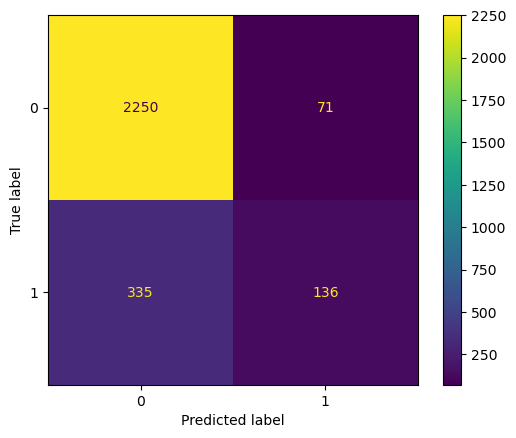

In [43]:
log_cm = confusion_matrix(y_test, y_pred, labels=logr.classes_)
ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=logr.classes_).plot(values_format='')

plt.show()

**True Positive:** 2246 \
**False Negative:** 75 \
**False Positive:** 359 \
**True Negative:** 112

We can see from the confusion matrix above that our logistic regression model performed poorly in predicting true negatives from our test data. We will use the classification report to gain more insights.

### Classification Report

In [46]:
target_names = ['Predicted would not leave', 'Predicted would leave']
classification_rep = classification_report(y_test, y_pred, target_names=target_names)

print(classification_rep)

                           precision    recall  f1-score   support

Predicted would not leave       0.87      0.97      0.92      2321
    Predicted would leave       0.66      0.29      0.40       471

                 accuracy                           0.85      2792
                macro avg       0.76      0.63      0.66      2792
             weighted avg       0.83      0.85      0.83      2792



Although the model has an 84% **Accuracy**, it does not accurately depict the situation. In terms of **Precision**, **Recall**, and **F1-score**, our model fared well in predicting if an employee would stay but poorly in predicting whether they would leave. This is because we had previously discovered that the dataset was biased. The dataset is skewed toward those who are still employed by the company, with minimal information collected about those who have left. Bias towards majority samples often leads to poor predictive performance for minority samples where data is sparse.

### Random Forests

The random forest algorithm is a machine learning technique that we will employ to create a better prediction model because our logistic regression model did not perform as expected. We won't eliminate the outliers because the random forest technique is far more reliable than general logistic regression and outliers don't affect its results. Since the `Department` column has the lowest correlation with employee attrition, we will just be removing that column.

In [49]:
df0['salary'] = label_encoder.fit_transform(df0['salary'])
df_rf = df0.copy()
y = df_rf['left']
X = df_rf.drop(columns=[ 'Department', 'left'])

X.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,promotion_last_5years,salary
0,0.38,0.53,2,157,3,0,0,1
1,0.80,0.86,5,262,6,0,0,2
2,0.11,0.88,7,272,4,0,0,2
3,0.72,0.87,5,223,5,0,0,1
4,0.37,0.52,2,159,3,0,0,1


### Train-Test Split
The dataset was split into training and testing sets to ensure robust model evaluation. We are using 75% of the data for training and 25% for testing. And we will have a n_estimators of 60 for our RandomForestClassifier.

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)
rf = RandomForestClassifier(n_estimators = 60)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=60)

### Confusion Matrix

Next, we will plot a confusion matrix for our model using our test dataset to observe its performance.

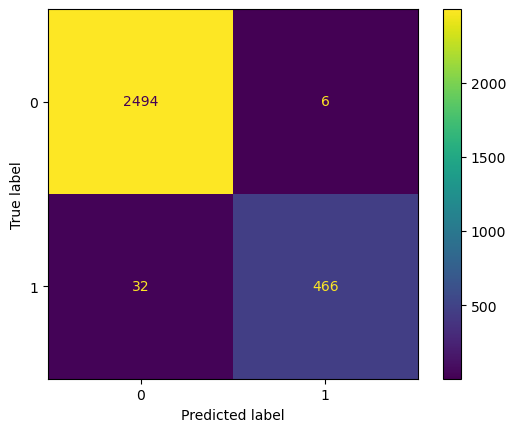

In [53]:
y_pred = rf.predict(X_test)
rf_cm = confusion_matrix(y_test, y_pred, labels=rf.classes_)
ConfusionMatrixDisplay(confusion_matrix=rf_cm, display_labels=rf.classes_).plot(values_format='')

plt.show()

**True Positive:** 2497 \
**False Negative:** 3 \
**False Positive:** 36 \
**True Negative:** 462

We can observe from the above figure our random forest model worked really well much better than our logistic regression model. We will use the classification report to see how well did it perfored.

### Classification Report

In [56]:
target_names = ['Predicted would not leave', 'Predicted would leave']
classification_rep = classification_report(y_test, y_pred, target_names=target_names)

print(classification_rep)

                           precision    recall  f1-score   support

Predicted would not leave       0.99      1.00      0.99      2500
    Predicted would leave       0.99      0.94      0.96       498

                 accuracy                           0.99      2998
                macro avg       0.99      0.97      0.98      2998
             weighted avg       0.99      0.99      0.99      2998



From the classification report we found for the "would not leave" class, the model achieved a precision of 0.98, indicating that 98% of the predictions for this class were accurate. The recall for this class is perfect at 1.00, meaning that all actual instances of "would not leave" were correctly identified. The F1-score, a balance between precision and recall, is 0.99, reflecting strong performance in both areas.

The "would leave" class also shows robust performance, with a precision of 0.99, meaning that the model very rarely misclassifies someone as "would leave". The recall is slightly lower at 0.92, indicating that 8% of instances where individuals would leave were not detected. The F1-score for this class is 0.96, suggesting that the model is still effective overall in predicting departures, but with some room for improvement in identifying all cases.

The macro average of 0.97 for the F1-score and the weighted average of 0.99 confirm that the model performs well across both classes, but is slightly skewed toward better performance on the majority class because of the biased dataset. Overall, the model's metrics demonstrate excellent performance, with a minor gap in recall for the minority "would leave" class. A balanced dataset will help improve the model's sensitivity for this group.

### Feature Importance  

Feature importance will help us to identify which features have the greatest influence on the model's predictions, providing insights into how the model makes its decisions.

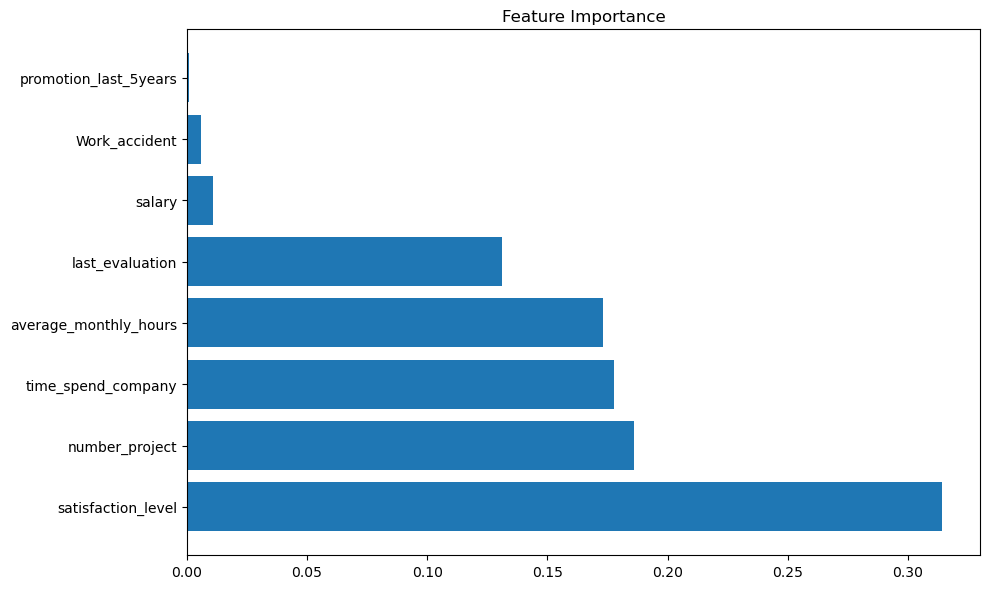

In [59]:
feature_names = X_train.columns
importances = rf.feature_importances_

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.barh(range(X.shape[1]), importances[indices], align="center")
plt.yticks(range(X.shape[1]), np.array(feature_names)[indices], rotation=0)
plt.tight_layout()
plt.show()

The feature importance chart reveals key insights into the factors influencing employee retention. The `satisfaction_level` emerges as the most significant predictor, contributing almost 40% of the decision-making process. However, this feature is likely intertwined with other factors, such as `salary`, `promotion in the last 5 years`, or `average monthly hours`. Employees with higher satisfaction levels may have received better compensation or recent promotions, leading to improved job satisfaction and reduced turnover.

`Average monthly hours`, `time spent at the company`, and `number of projects` are the next most critical factors. High monthly hours or an excessive workload might lead to employee burnout, driving dissatisfaction and ultimately turnover. Similarly, employees who have been with the company for extended periods without progression might feel stagnant, increasing their likelihood of leaving.

Less influential features include `salary` and `work accidents`, which may appear to have lower importance in the model, but they indirectly affect satisfaction. A lower salary or lack of recognition through promotions could lead to dissatisfaction over time.

It is interesting to note that, although our heatmap from earlier indicates otherwise, `promotion in the last 5 years` has virtually little direct influence in our model. This suggests that promotions by themselves could not have a big impact on retention unless they are paired with other factors like working hours, pay scales, or working conditions.

## Conclusion

To effectively address employee turnover, the senior leadership team should prioritize improving job satisfaction, as it is the most influential factor in employee retention. Given the interconnected nature of satisfaction with variables like salary, workload, and promotions, a multi-faceted strategy is recommended.

#### 1. Enhance Job Satisfaction
Conduct regular employee surveys to assess satisfaction levels and identify areas for improvement. This will allow the company to proactively address concerns before they escalate into turnover decisions.

#### 2. Review Compensation and Promotions
Ensure that salary packages are competitive and aligned with industry standards. Additionally, create clear and attainable career progression paths, including regular promotions and recognition, to enhance employee satisfaction and loyalty.

#### 3. Workload Management
Address issues related to high "average monthly hours" and project overload by distributing tasks more evenly and providing adequate resources for teams. Offering flexible working hours or remote work options could also help alleviate burnout.

#### 4. Career Development Opportunities
Invest in employee development programs, mentorships, and skill-building workshops to keep employees engaged and motivated. This also supports long-term career growth within the company.

#### 5. Promote Work-Life Balance
Encourage a healthy work-life balance through policies that promote well-being, such as paid time off, wellness programs, and stress management initiatives.

By focusing on these key areas, the company can improve employee satisfaction and retention, fostering a more motivated and productive workforce.
